In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

# Basic

## Optimization

In [2]:
from scipy.optimize import minimize # function to minimize f(x)

Minimize $f(x) = (x-3)^2$

In [3]:
# to minimize a function, first one has to create a function
def f(x):
    return ((x -3) ** 2)
result = minimize(f, 2)

In [4]:
# the result shows stats about the optimization process
# it tells the minimum value and the value of variabes at which function gives minimum value
result
# x = array containg value of x at with function has min value
# fun = min value of the function

      fun: 5.551437397369767e-17
 hess_inv: array([[0.5]])
      jac: array([-4.3254289e-13])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.99999999])

Minimize $f(x, y) = (x-1)^2 + (y-2.5)^2$ subject to

$$x-2y+2 \geq 0 $$
$$-x-2y+6 \geq 0$$
$$-x + 2y + 2 \geq 0$$
$$x \geq 0 $$
$$y \geq 0 $$

<p align="center">
  <img src="opt_reg.PNG" alt="drawing" width="300"/>
</p>

* 2D function takes in vector $x$
* Constraints must be specified as $g_i(x) \geq 0$
* Bounds specified as rectangular 

In [5]:
# the above 5 inequalities tell that the region that has to be containg the fxn is inside the red pentagon
# the last ones are bounds : x > 0 and 

In [6]:
# here x is a vector that contains both the x and y values as given the the function and the constraint
f = lambda x : (x[0] - 1)**2 + (x[1] - 2.5)**2

# now we have to define constraints, a tuple of dictionaries
cons = (
    {'type' : 'ineq', 'fun' : lambda x : x[0] - 2*x[1] + 2},
    {'type' : 'ineq', 'fun' : lambda x : -x[0] - 2*x[1] + 6},
    {'type' : 'ineq', 'fun' : lambda x : -x[0] + 2*x[1] + 2}
)

# bounds
bnds = ((0, None), (0, None))
# (0, None) means from 0 to infinty, that means it is unbounded
# the first and the second represents by x and y axis bounds respectively

In [7]:
result = minimize(f, (2,0), bounds=bnds, constraints=cons)

In [8]:
result

     fun: 0.8000000011920985
     jac: array([ 0.80000002, -1.59999999])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.4, 1.7])

## Interpolation

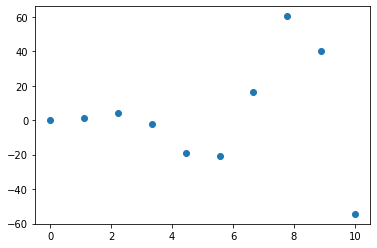

In [9]:
# fabricating data points for interpolation 
x = np.linspace(0, 10, 10)
y = x**2 * np.sin(x)

# creating a scatter plot (plotting the data point in coordinate form (x,y))
plt.scatter(x,y)

### Linear interpolation

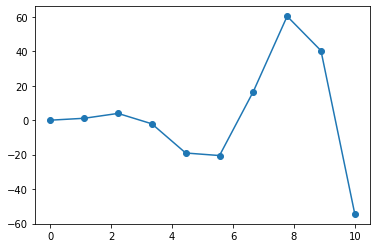

In [10]:
# now if one wishes to join the data points one will get a curve such that it represents a function
# if joined the points using straight lines, that will be called linear interpolation 
# but that is not what the function's graph will look like

plt.scatter(x, y)
plt.plot(x, y)

In [11]:
# hence to form a continuous curve to find out about what is going on in the middle of these data points

from scipy.interpolate import interp1d

In [12]:
# interplotion using scipy

def plot_interpolated_curve(curve_kind):
    f = interp1d(x, y, kind=curve_kind)
    x_dence = np.linspace(0, 10, 100)
    y_dence = f(x_dence)
    plt.plot(x_dence, y_dence)

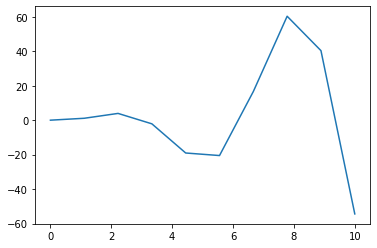

In [13]:
# linear interploation using scipy
# similar shape as perviously interpolated graph using only matplotlib
plot_interpolated_curve('linear')

### smooth interpolation

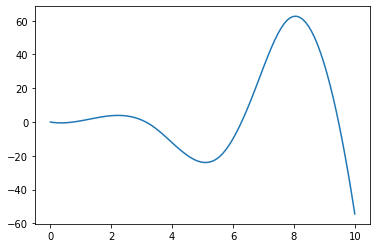

In [14]:
# obtaining smooth curve using scipy
plot_interpolated_curve('cubic')

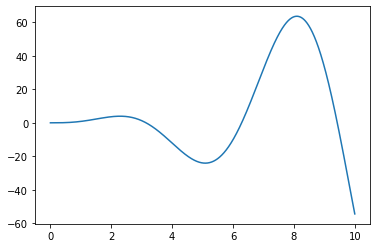

In [15]:
# a smooth curve can also be obtained using just matplotlib by just increasing the number of data points
x = np.linspace(0, 10, 10000)
y = x**2 * np.sin(x)
plt.plot(x, y)

## Curve fitting

The equation for spring motion is $y(t) = A\cos(\omega t+\phi)$. Want to find the natural frequency of oscillation $\omega$ for the spring. You collect the data

In [16]:
# data related to time taken for displacement from mean position in subsequent back and forth motion
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])

# data related to displacement recorded from mean position in back and forth motion
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

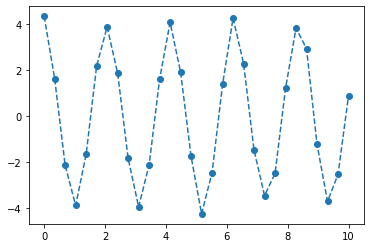

In [17]:
plt.plot(t_data,y_data,'o--') # the plot shows linear interpolation

$\omega = 2 \pi f$, $f=1/T$, and $T \approx 2$ seconds (judging from the plot). Thus good initial guess is

* $ Frequency, \omega = 2 \pi (1/2) = \pi$
* $ Amplitide, A=4$
* $ Initial Phase, \phi = 0$

In [18]:
# imports for getting optimal accurate values
from scipy.optimize import curve_fit

# constructing the simple harmonic function
# f is a fxn of t, i.e., f(t), with additional parameters - A, w, phi
def f(t, A, w, phi):
    return A * np.cos(w * t + phi)

# finding optimal parameters for A, omega, phi
popt, pcov = curve_fit(f, t_data, y_data, p0=(4, np.pi, 0))

In [19]:
popt # optimal values for parameters - A, w, phi in series

array([3.94836219, 2.99899521, 0.1041135 ])

In [20]:
A, w, phi = popt
t = np.linspace(0, 10, 100)
y = f(t, A, w, phi)

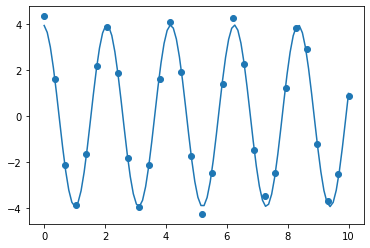

In [21]:
plt.scatter(t_data, y_data) # to plot the datapoints
plt.plot(t, y) # this is the best 

In [22]:
# using scipy one approximate the values of the parameters with accuracy and get a nicely fitted curve
# But there are errors too in these approximations that can be calculates using scipy as well
pcov # this is a covariance matrix whose daigonal elemets hint to the errors in approximations 

array([[ 2.61882716e-03, -4.94133398e-06,  3.47405204e-05],
       [-4.94133398e-06,  1.85637994e-05, -9.60757777e-05],
       [ 3.47405204e-05, -9.60757777e-05,  6.63424432e-04]])

In [23]:
varience = np.diag(pcov)# to get te daiginal elements (varience in values of A, w, phi in order)

In [24]:
# error is the same as standard deviation
np.sqrt(varience) # gives an array for errors of A, w, phi in order

array([0.05117448, 0.00430857, 0.02575703])

# Calculus

## Diffrentiation

In [25]:
from scipy.misc import derivative

def f(x):
    return x**2 * np.sin(2*x) * np.exp(-x)

x = np.linspace(0, 1, 100)

In [26]:
# calculative derivatives
d1 = derivative(f, x, dx = 1e-6) # first derivative
d2 = derivative(f, x, dx = 1e-6, n = 2) # second derivative

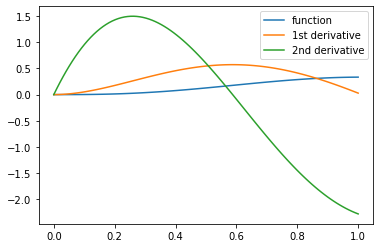

In [27]:
plt.plot(x, f(x), label = 'function')
plt.plot(x, d1, label = '1st derivative')
plt.plot(x, d2, label = '2nd derivative')
plt.legend()

In [29]:
d2


array([-4.00000000e-12,  1.18756831e-01,  2.32579313e-01,  3.41437226e-01,
        4.45307555e-01,  5.44174189e-01,  6.38027988e-01,  7.26866158e-01,
        8.10692876e-01,  8.89518060e-01,  9.63357432e-01,  1.03223376e+00,
        1.09617350e+00,  1.15521221e+00,  1.20938676e+00,  1.25874224e+00,
        1.30332637e+00,  1.34319292e+00,  1.37840607e+00,  1.40901527e+00,
        1.43509510e+00,  1.45671496e+00,  1.47396331e+00,  1.48690088e+00,
        1.49560572e+00,  1.50018539e+00,  1.50071275e+00,  1.49727453e+00,
        1.48997481e+00,  1.47891421e+00,  1.46418294e+00,  1.44591977e+00,
        1.42415940e+00,  1.39904754e+00,  1.37069522e+00,  1.33922734e+00,
        1.30468553e+00,  1.26727795e+00,  1.22701849e+00,  1.18410837e+00,
        1.13857535e+00,  1.09064147e+00,  1.04029285e+00,  9.87807058e-01,
        9.33170208e-01,  8.76590467e-01,  8.18081713e-01,  7.57852114e-01,
        6.95943303e-01,  6.32632835e-01,  5.67768055e-01,  5.01737540e-01,
        4.34374758e-01,  

## Integration

$$ \int_0^{1} x^2 \sin(2x) e^{-x} dx $$

In [32]:
from scipy.integrate import quad

# integrand is rhe function to be integrated
integrand = lambda x: x**2 * np.sin(x) * np.exp(-x)

# 0 and 1 are the lower and upper limits respectively
integral, integral_error = quad(integrand, 0, 1)

In [33]:
integral

0.10246777930717413

$$ \int_{0}^{1} \int_{-x}^{x^2} \sin(x+y^2) dy dx $$

In [36]:
from scipy.integrate import dblquad # function for double integration

integrand = lambda x, y: np.sin(x + y**2)

# lower and upper bounds on y
lwr_y = lambda x: -x
upr_y = lambda x: x**2

integral, integral_error = dblquad(integrand, 0, 1, lwr_y, upr_y)

In [37]:
integral

0.315802507240474